Problem statement: Book-My-Show will enable the ads on their website, but they are also very cautious about their user
privacy and information who visit their website. Some ads URL could contain a malicious link that can
trick any recipient and lead to a malware installation, freezing the system as part of a ransomware
attack or revealing sensitive information. Book-My-Show now wants to analyze that whether the
particular URL is prone to phishing (malicious) or not.
Dataset Details:
The input dataset contains an 11k sample corresponding to the 11k URL. Each sample contains 32
features that give a different and unique description of URL ranging from -1,0,1.
1: Phishing
0: Suspicious
1: Legitimate

### Imports

In [344]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
%matplotlib inline

import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### Data Load

In [303]:
# Load Data
ds = pd.read_csv('dataset.csv')

In [304]:
ds.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [305]:
ds.shape

(11055, 32)

In [306]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [307]:
ds.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [308]:
# check for missing values
ds.isna().any()

index                          False
having_IPhaving_IP_Address     False
URLURL_Length                  False
Shortining_Service             False
having_At_Symbol               False
double_slash_redirecting       False
Prefix_Suffix                  False
having_Sub_Domain              False
SSLfinal_State                 False
Domain_registeration_length    False
Favicon                        False
port                           False
HTTPS_token                    False
Request_URL                    False
URL_of_Anchor                  False
Links_in_tags                  False
SFH                            False
Submitting_to_email            False
Abnormal_URL                   False
Redirect                       False
on_mouseover                   False
RightClick                     False
popUpWidnow                    False
Iframe                         False
age_of_domain                  False
DNSRecord                      False
web_traffic                    False
P

<AxesSubplot: >

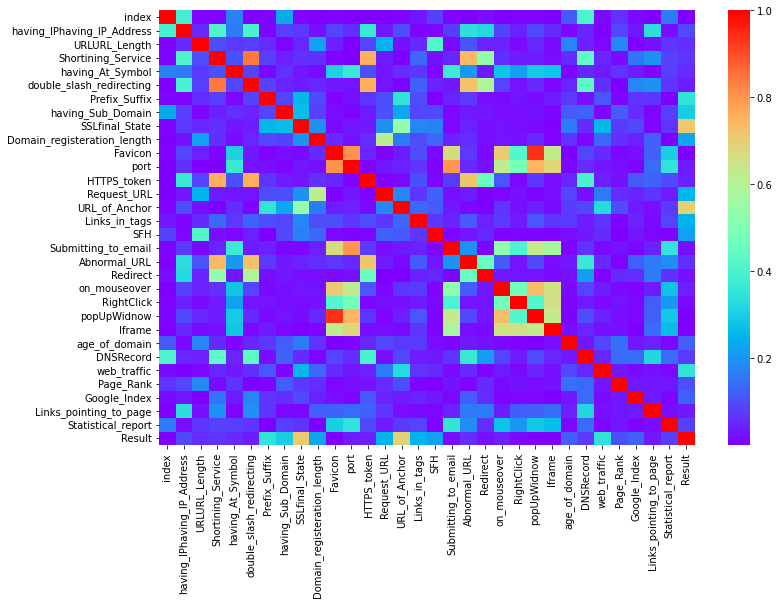

In [309]:
# Drop highly correlated columns
cor_matrix = ds.corr().abs()
plt.figure(figsize=(12,8))
sns.heatmap(cor_matrix,cmap='rainbow') #, annot=True)

<Figure size 288x288 with 0 Axes>

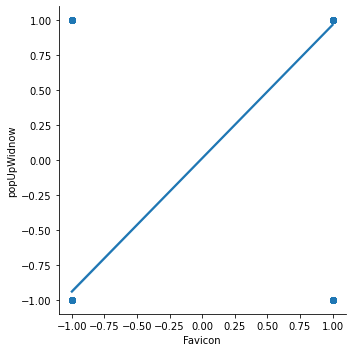

<Figure size 288x288 with 0 Axes>

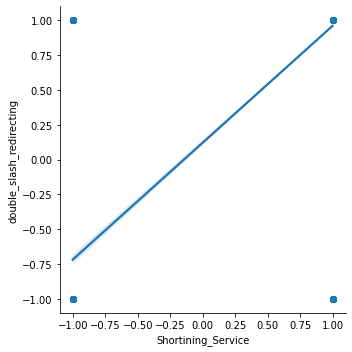

In [310]:
# 
plt.figure(figsize=(4,4))
sns.lmplot(data=ds,x='Favicon', y='popUpWidnow')
plt.figure(figsize=(4,4))
sns.lmplot(data=ds,x='Shortining_Service', y='double_slash_redirecting')

In [311]:
print(cor_matrix)
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
print(upper_tri)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
print(to_drop)
ds = ds.drop(to_drop, axis=1)
print(ds.shape)

                                index  having_IPhaving_IP_Address  \
index                        1.000000                    0.388317   
having_IPhaving_IP_Address   0.388317                    1.000000   
URLURL_Length                0.006105                    0.052411   
Shortining_Service           0.006281                    0.403461   
having_At_Symbol             0.169478                    0.158699   
double_slash_redirecting     0.003363                    0.397389   
Prefix_Suffix                0.007340                    0.005257   
having_Sub_Domain            0.234091                    0.080745   
SSLfinal_State               0.006682                    0.071414   
Domain_registeration_length  0.001180                    0.022739   
Favicon                      0.007293                    0.087025   
port                         0.001656                    0.060979   
HTTPS_token                  0.002916                    0.363534   
Request_URL                  0.000

### Feature Engineering

In [312]:
ds.set_index('index')

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
index,,,,,,,,,,,,,,,,,,,,,
1,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
2,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
3,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
4,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
5,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11051,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11052,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,1,1,1,1,1,1,1,-1,1,-1
11053,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1


In [313]:
ds.columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic',
       'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [314]:
# Split dataset into x, y and set index
y = ds['Result']
x = ds.drop('Result',axis=1)
x = x.set_index('index')
print(ds.shape)
print(x.shape)
print(y.shape)



(11055, 31)
(11055, 29)
(11055,)


In [315]:
x = pd.get_dummies(x, columns=['having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report'],
        prefix=['having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report'])
x.head(10)

,having_IPhaving_IP_Address_-1,having_IPhaving_IP_Address_1,URLURL_Length_-1,URLURL_Length_0,URLURL_Length_1,Shortining_Service_-1,Shortining_Service_1,having_At_Symbol_-1,having_At_Symbol_1,double_slash_redirecting_-1,...,web_traffic_1,Page_Rank_-1,Page_Rank_1,Google_Index_-1,Google_Index_1,Links_pointing_to_page_-1,Links_pointing_to_page_0,Links_pointing_to_page_1,Statistical_report_-1,Statistical_report_1
index,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,1,0,1,0,1,1,...,0,1,0,0,1,0,0,1,1,0
2,0,1,0,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,1
3,0,1,0,1,0,0,1,0,1,0,...,1,1,0,0,1,0,1,0,1,0
4,0,1,0,1,0,0,1,0,1,0,...,1,1,0,0,1,1,0,0,0,1
5,0,1,0,1,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,1
6,1,0,0,1,0,1,0,0,1,1,...,1,1,0,0,1,1,0,0,1,0
7,0,1,0,1,0,1,0,0,1,0,...,0,1,0,0,1,0,1,0,1,0
8,0,1,0,1,0,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1
9,0,1,0,1,0,1,0,0,1,0,...,1,0,1,0,1,0,1,0,0,1


In [316]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(7738, 66)
(7738,)
(3317, 66)
(3317,)


#### Feature selection

In [317]:
pca = PCA(n_components=0.95)
x_train_transformed = pca.fit_transform(x_train)
x_test_transformed = pca.transform(x_test)
print(x_train_transformed.shape)
print(x_test_transformed.shape)

(7738, 27)
(3317, 27)


In [318]:
lda = LDA(n_components=1)
x_train_transformed = lda.fit_transform(x_train,y_train)
x_test_transformed = lda.transform(x_test)
print(x_train_transformed.shape)
print(x_test_transformed.shape)

(7738, 1)
(3317, 1)


## Modeling

### Random Forest

In [319]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)


In [320]:
# No LDA
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred

array([-1,  1,  1, ...,  1, -1,  1], dtype=int64)

In [321]:
cm =  confusion_matrix (y_test, y_pred)
print(cm)
print('Accuracy' +  str(accuracy_score(y_test, y_pred)))

[[1245  176]
 [ 125 1771]]
Accuracy0.9092553512209828


In [322]:
# LDA
classifier.fit(x_train_transformed, y_train)
y_pred = classifier.predict(x_test_transformed)
y_pred

array([-1,  1,  1, ...,  1, -1,  1], dtype=int64)

In [323]:
cm =  confusion_matrix (y_test, y_pred)
print(cm)
print('Accuracy' +  str(accuracy_score(y_test, y_pred)))

[[1292  129]
 [  99 1797]]
Accuracy0.931263189629183


##### KFold

In [354]:
from sklearn.model_selection import StratifiedKFold
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(x_train_transformed, y_train)

In [355]:
scores = []
xtdf =  pd.DataFrame(x_train_transformed)
for k, (train, test) in enumerate(kfold):
    classifier.fit(xtdf.iloc[train, :], y_train.iloc[train])
    score = classifier.score(xtdf.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    #Training/Test Split Distribution: %s,
    print('Fold: %2d,  Accuracy: %.3f' % (k+1, score))
 
print('\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1,  Accuracy: 0.937
Fold:  2,  Accuracy: 0.929
Fold:  3,  Accuracy: 0.916
Fold:  4,  Accuracy: 0.937
Fold:  5,  Accuracy: 0.930
Fold:  6,  Accuracy: 0.920
Fold:  7,  Accuracy: 0.932
Fold:  8,  Accuracy: 0.919
Fold:  9,  Accuracy: 0.940
Fold: 10,  Accuracy: 0.931

Cross-Validation accuracy: 0.929 +/- 0.008


### Logistic Regression

In [326]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')


In [327]:

LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
y_pred

array([-1,  1,  1, ...,  1, -1,  1], dtype=int64)

In [328]:
cm =  confusion_matrix (y_test, y_pred)
print(cm)
print('Accuracy' +  str(accuracy_score(y_test, y_pred)))

[[1319  102]
 [  98 1798]]
Accuracy0.9397045523063009


In [329]:
LR.fit(x_train_transformed, y_train)
y_pred = LR.predict(x_test_transformed)
y_pred

array([-1,  1,  1, ...,  1, -1,  1], dtype=int64)

In [330]:
cm =  confusion_matrix (y_test, y_pred)
print(cm)
print('Accuracy' +  str(accuracy_score(y_test, y_pred)))

[[1301  120]
 [ 122 1774]]
Accuracy0.9270425082906241


In [356]:
from sklearn.model_selection import StratifiedKFold
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(x_train_transformed, y_train)

scores = []
xtdf =  pd.DataFrame(x_train_transformed)
for k, (train, test) in enumerate(kfold):
    LR.fit(xtdf.iloc[train, :], y_train.iloc[train])
    score = LR.score(xtdf.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    #Training/Test Split Distribution: %s,
    print('Fold: %2d,  Accuracy: %.3f' % (k+1, score))
 
print('\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1,  Accuracy: 0.933
Fold:  2,  Accuracy: 0.924
Fold:  3,  Accuracy: 0.924
Fold:  4,  Accuracy: 0.938
Fold:  5,  Accuracy: 0.935
Fold:  6,  Accuracy: 0.922
Fold:  7,  Accuracy: 0.932
Fold:  8,  Accuracy: 0.915
Fold:  9,  Accuracy: 0.939
Fold: 10,  Accuracy: 0.924

Cross-Validation accuracy: 0.929 +/- 0.008


### SVM

In [332]:
from sklearn import svm
SVM = svm.LinearSVC()


In [333]:
SVM.fit(x_train, y_train)
y_pred = SVM.predict(x_test)
y_pred

array([-1,  1,  1, ...,  1, -1,  1], dtype=int64)

In [334]:
cm =  confusion_matrix (y_test, y_pred)
print(cm)
print('Accuracy' +  str(accuracy_score(y_test, y_pred)))

[[1319  102]
 [  98 1798]]
Accuracy0.9397045523063009


In [335]:
SVM.fit(x_train_transformed, y_train)
y_pred = SVM.predict(x_test_transformed)
y_pred

array([-1,  1,  1, ...,  1, -1,  1], dtype=int64)

In [336]:
cm =  confusion_matrix (y_test, y_pred)
print(cm)
print('Accuracy' +  str(accuracy_score(y_test, y_pred)))

[[1301  120]
 [ 122 1774]]
Accuracy0.9270425082906241


In [337]:
# KFolds
from sklearn.model_selection import StratifiedKFold
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(x_train_transformed, y_train)

scores = []
xtdf =  pd.DataFrame(x_train_transformed)
for k, (train, test) in enumerate(kfold):
    SVM.fit(xtdf.iloc[train, :], y_train.iloc[train])
    score = SVM.score(xtdf.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    #Training/Test Split Distribution: %s,
    print('Fold: %2d,  Accuracy: %.3f' % (k+1, score))
 
print('\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1,  Accuracy: 0.933
Fold:  2,  Accuracy: 0.924
Fold:  3,  Accuracy: 0.924
Fold:  4,  Accuracy: 0.938
Fold:  5,  Accuracy: 0.935
Fold:  6,  Accuracy: 0.922
Fold:  7,  Accuracy: 0.932
Fold:  8,  Accuracy: 0.915
Fold:  9,  Accuracy: 0.939
Fold: 10,  Accuracy: 0.924

Cross-Validation accuracy: 0.929 +/- 0.008


### Neural Networks

In [338]:
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(solver='lbfgs',alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=5000)


In [339]:
NN.fit(x_train, y_train)
y_pred = NN.predict(x_test)
y_pred

array([-1,  1,  1, ...,  1, -1,  1], dtype=int64)

In [340]:
cm =  confusion_matrix (y_test, y_pred)
print(cm)
print('Accuracy' +  str(accuracy_score(y_test, y_pred)))

[[1334   87]
 [  95 1801]]
Accuracy0.9451311425987338


In [341]:
NN.fit(x_train_transformed, y_train)
y_pred = NN.predict(x_test_transformed)
y_pred

array([-1,  1,  1, ...,  1, -1,  1], dtype=int64)

In [342]:
cm =  confusion_matrix (y_test, y_pred)
print(cm)
print('Accuracy' +  str(accuracy_score(y_test, y_pred)))

[[1278  143]
 [  85 1811]]
Accuracy0.931263189629183


In [361]:
from sklearn.model_selection import StratifiedKFold
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(x_train_transformed, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    NN.fit(x_train.iloc[train, :], y_train.iloc[train])
    score = NN.score(x_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    #Training/Test Split Distribution: %s,
    print('Fold: %2d,  Accuracy: %.3f' % (k+1, score))
 
print('\nCross-Validation accuracy: %.4f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1,  Accuracy: 0.942
Fold:  2,  Accuracy: 0.939
Fold:  3,  Accuracy: 0.939
Fold:  4,  Accuracy: 0.952
Fold:  5,  Accuracy: 0.941
Fold:  6,  Accuracy: 0.939
Fold:  7,  Accuracy: 0.942
Fold:  8,  Accuracy: 0.942
Fold:  9,  Accuracy: 0.937
Fold: 10,  Accuracy: 0.942

Cross-Validation accuracy: 0.9415 +/- 0.004


### End